# Implementasi PCA dan MDS pada Iris Dataset
**Nama:** Farah Aulia  <br>
**NIM:** 18222096

In [ ]:
#Import library
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

## 1. Load Dataset dan Preprocessing
Pada bagian ini, dilakukan proses pemuatan dataset Iris dan preprocessing awal berupa normalisasi. Dataset Iris terdiri dari 150 sampel bunga dengan 4 fitur numerik: panjang dan lebar sepal serta panjang dan lebar petal. Dataset ini juga memiliki label kelas untuk tiga spesies bunga: Setosa, Versicolor, dan Virginica.

Langkah-langkah yang dilakukan:
- Load data dari library `sklearn.datasets`
- Konversi ke dalam format DataFrame
- Normalisasi fitur menggunakan `StandardScaler`

In [ ]:
#load data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
# Konversi ke dalam DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['class'] = y

### Menampilkan Data

In [ ]:
print("Data Iris:")
display(df)

Data Iris:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Normalisasi

In [ ]:
# Normalisasi fitur (StandardScaler: mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame agar mudah digunakan
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled['class'] = y

print("\nData setelah dinormalisasi:")
display(df_scaled)


Data setelah dinormalisasi:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


## 2. Implementasi PCA (Manual)
Pada bagian ini, kita mengimplementasikan algoritma Principal Component Analysis (PCA) secara manual tanpa menggunakan library `sklearn.decomposition.PCA`.

Langkah-langkah:
1. Hitung mean dari setiap fitur
2. Hitung matriks kovarians
3. Hitung eigenvalue dan eigenvector dari matriks kovarians
4. Pilih 2 komponen utama berdasarkan eigenvalue terbesar
5. Proyeksikan data ke ruang berdimensi 2

### 2.1 Hitung Mean dan Matriks Kovarians

In [ ]:
# Hitung mean dari setiap fitur
mean_vector = np.mean(X_scaled, axis=0)
feature_names = df_scaled.columns[:-1]
mean_df = pd.DataFrame({
    'Fitur': feature_names,
    'Mean': mean_vector
})

print("Mean dari setiap fitur:")
display(mean_df)

Mean dari setiap fitur:


,Fitur,Mean
0,sepal length (cm),-1.690315e-15
1,sepal width (cm),-1.842970e-15
2,petal length (cm),-1.698641e-15
3,petal width (cm),-1.409243e-15


In [ ]:
# Hitung matriks kovarians
cov_matrix = np.cov(X_scaled.T)
cov_df = pd.DataFrame(cov_matrix, index=feature_names, columns=feature_names)

print("\nMatriks Kovarians:")
display(cov_df)


Matriks Kovarians:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


### 2.2 Hitung Eigenvalue dan Eigenvector

In [ ]:
# Hitung eigenvalue dan eigenvector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Urutkan eigenvalue dari besar ke kecil
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_idx]
eig_vecs_sorted = eig_vecs[:, sorted_idx]

# Tampilkan semua eigenvalue dengan indeks komponen
eigval_df = pd.DataFrame({
    'Komponen': [f'PC{i+1}' for i in range(len(eig_vals_sorted))],
    'Eigenvalue': eig_vals_sorted
})
print("Eigenvalue (diurutkan dari terbesar):")
display(eigval_df)

# Tampilkan eigenvector-nya dengan label fitur
eigvec_df = pd.DataFrame(
    eig_vecs_sorted,
    index=feature_names,
    columns=[f'PC{i+1}' for i in range(len(eig_vals_sorted))]
)
print("Eigenvector (masing-masing kolom adalah PC):")
display(eigvec_df)

Eigenvalue (diurutkan dari terbesar):


,Komponen,Eigenvalue
0,PC1,2.938085
1,PC2,0.920165
2,PC3,0.147742
3,PC4,0.020854


Eigenvector (masing-masing kolom adalah PC):


,PC1,PC2,PC3,PC4
sepal length (cm),0.521066,-0.377418,-0.719566,0.261286
sepal width (cm),-0.269347,-0.923296,0.244382,-0.123510
petal length (cm),0.580413,-0.024492,0.142126,-0.801449
petal width (cm),0.564857,-0.066942,0.634273,0.523597


### 2.3 Proyeksi ke Dimensi 2

In [ ]:
# Mengambil 2 komponen utama
top2_eigvecs = eig_vecs_sorted[:, :2]
top2_eigvals = eig_vals_sorted[:2]

# Tampilkan 2 komponen utama
top2_df = pd.DataFrame(
    top2_eigvecs,
    index=feature_names,
    columns=['PC1', 'PC2']
)
print("2 Eigenvector utama (PC1 dan PC2):")
display(top2_df)

print("2 Eigenvalue terbesar:", top2_eigvals)

2 Eigenvector utama (PC1 dan PC2):


,PC1,PC2
sepal length (cm),0.521066,-0.377418
sepal width (cm),-0.269347,-0.923296
petal length (cm),0.580413,-0.024492
petal width (cm),0.564857,-0.066942


2 Eigenvalue terbesar: [2.93808505 0.9201649 ]


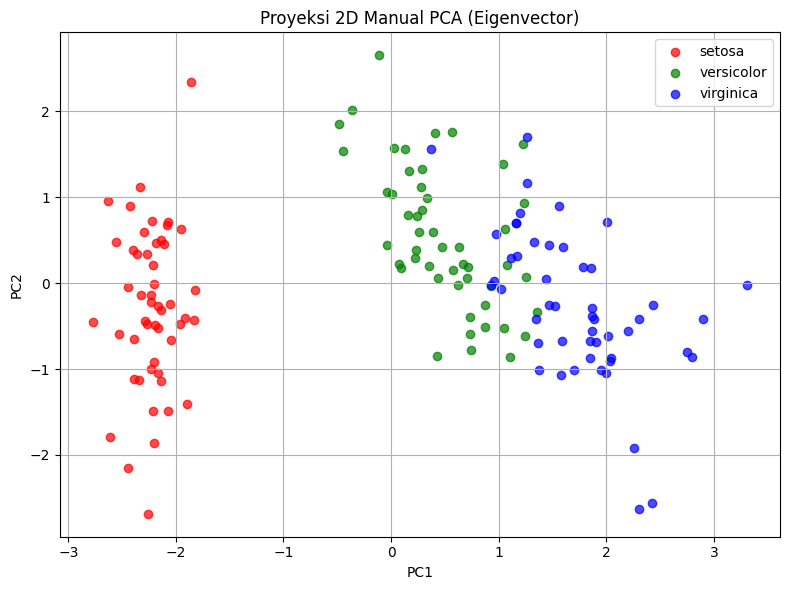

In [ ]:
# Ambil 2 eigenvector utama (dari eigenvector yang sudah diurutkan)
top_2_eigvecs = eig_vecs_sorted[:, :2]

# Proyeksikan data ke 2D menggunakan 2 eigenvector utama
X_pca_manual = X_scaled.dot(top_2_eigvecs)

# Buat DataFrame hasil proyeksi
df_pca_manual = pd.DataFrame(X_pca_manual, columns=['PC1', 'PC2'])
df_pca_manual['target'] = y

# Visualisasikan proyeksi 2D
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
target_names = ['setosa', 'versicolor', 'virginica']

for i, label in enumerate(np.unique(y)):
    plt.scatter(
        df_pca_manual[df_pca_manual['target'] == label]['PC1'],
        df_pca_manual[df_pca_manual['target'] == label]['PC2'],
        color=colors[i],
        label=target_names[i],
        alpha=0.7
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyeksi 2D Manual PCA (Eigenvector)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Variansi yang Dijelaskan oleh Masing-Masing Komponen:


,Komponen,Eigenvalue,Explained Variance (%),Cumulative Variance (%)
0,PC1,2.938085,72.962445,72.962445
1,PC2,0.920165,22.850762,95.813207
2,PC3,0.147742,3.668922,99.482129
3,PC4,0.020854,0.517871,100.000000


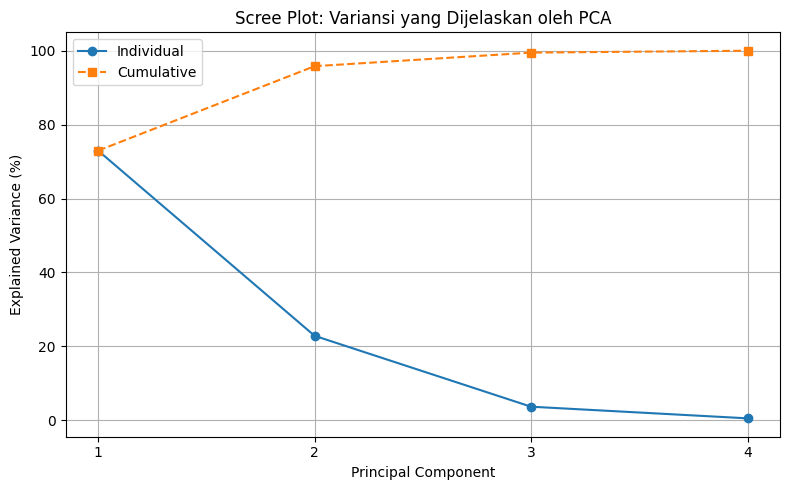

In [ ]:
# 1. Analisis: Variansi yang dijelaskan oleh masing-masing PC
total_variance = np.sum(eig_vals_sorted)
explained_variance_ratio = eig_vals_sorted / total_variance

# Buat DataFrame untuk variansi yang dijelaskan
explained_df = pd.DataFrame({
    'Komponen': [f'PC{i+1}' for i in range(len(eig_vals_sorted))],
    'Eigenvalue': eig_vals_sorted,
    'Explained Variance (%)': explained_variance_ratio * 100,
    'Cumulative Variance (%)': np.cumsum(explained_variance_ratio) * 100
})

print("📊 Variansi yang Dijelaskan oleh Masing-Masing Komponen:")
display(explained_df)

# 2. Visualisasi variansi yang dijelaskan (Scree plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(eig_vals_sorted)+1), explained_variance_ratio * 100, marker='o', label='Individual')
plt.plot(range(1, len(eig_vals_sorted)+1), np.cumsum(explained_variance_ratio) * 100, marker='s', linestyle='--', label='Cumulative')
plt.xticks(range(1, len(eig_vals_sorted)+1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot: Variansi yang Dijelaskan oleh PCA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Implementasi MDS (Manual - Classical MDS)
Multi Dimensional Scaling (MDS) bertujuan untuk memproyeksikan data berdimensi tinggi ke dimensi lebih rendah (misalnya 2D) sambil mempertahankan jarak antar data sebanyak mungkin.

Langkah-langkah:
1. Hitung jarak Euclidean antar pasangan data
2. Bangun matriks jarak
3. Gunakan algoritma klasik MDS untuk mendapatkan proyeksi 2 dimensi

### 3.1 Hitung Matriks Jarak (Euclidean)
Langkah pertama dalam MDS adalah menghitung jarak antar semua pasangan data menggunakan jarak Euclidean. Hasilnya adalah sebuah matriks simetris berukuran *n × n* yang merepresentasikan jarak antar titik dalam ruang asli.

In [ ]:
# Hitung jarak Euclidean antar pasangan data (menghasilkan matriks n x n)
D = squareform(pdist(X_scaled, metric='euclidean'))

# Konversi ke DataFrame untuk tampilan yang lebih jelas
D_df = pd.DataFrame(D)
D_df.index.name = 'Index'
D_df.columns = [f'P{i}' for i in range(len(D_df.columns))]

print("Matriks Jarak Euclidean:")
display(D_df)

Matriks Jarak Euclidean:


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P140,P141,P142,P143,P144,P145,P146,P147,P148,P149
Index,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.176219,0.845607,1.103685,0.260139,1.038444,0.661331,0.266276,1.620821,0.962877,...,4.323335,4.203388,3.679790,4.347745,4.371458,4.170050,4.075223,3.805412,3.826157,3.335064
1,1.176219,0.000000,0.523373,0.434000,1.386485,2.181206,0.998654,0.930463,0.648099,0.271197,...,4.346806,4.241393,3.331094,4.437906,4.513641,4.130727,3.660136,3.746638,4.017345,3.213476
2,0.845607,0.523373,0.000000,0.283891,0.991572,1.853897,0.497194,0.597511,0.782483,0.376784,...,4.503900,4.411912,3.574016,4.577287,4.620161,4.317340,3.973046,3.936541,4.072716,3.380336
3,1.103685,0.434000,0.283891,0.000000,1.250160,2.100774,0.705317,0.843695,0.523373,0.386603,...,4.504592,4.426571,3.486580,4.588504,4.642323,4.311771,3.887869,3.922954,4.097587,3.340154
4,0.260139,1.386485,0.991572,1.250160,0.000000,0.900113,0.681319,0.463889,1.767789,1.166192,...,4.433129,4.323032,3.829088,4.448334,4.456354,4.296127,4.252915,3.935711,3.890518,3.457620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4.170050,4.130727,4.317340,4.311771,4.296127,4.121389,4.349495,4.141813,4.486161,4.197460,...,0.349293,0.339039,1.395203,0.620434,0.791824,0.000000,1.360083,0.463325,1.108067,1.173044
146,4.075223,3.660136,3.973046,3.887869,4.252915,4.357976,4.142182,3.967153,3.916907,3.789007,...,1.640744,1.648230,0.763043,1.871492,2.099612,1.360083,0.000000,1.189008,2.153099,1.257071
147,3.805412,3.746638,3.936541,3.922954,3.935711,3.802866,3.977470,3.766660,4.099560,3.806455,...,0.663805,0.668634,1.103120,0.811378,1.024490,0.463325,1.189008,0.000000,1.071844,0.775292


### 3.2 Bangun Matriks B
Setelah menghitung matriks jarak Euclidean, kita membangun **matriks B** menggunakan teknik **double centering**. Matriks B ini akan digunakan untuk mendapatkan representasi data dalam ruang berdimensi rendah.


In [ ]:
#Bangun matriks B dari matriks jarak D
n = D.shape[0]

# Matriks centering H
H = np.eye(n) - np.ones((n, n)) / n

# Matriks B (kernel dari MDS klasik)
B = -0.5 * H @ (D ** 2) @ H

# Konversi ke DataFrame agar mudah dibaca
B_df = pd.DataFrame(B)
B_df.index.name = 'Index'
B_df.columns = [f'B{i}' for i in range(n)]

print("Matriks B:")
display(B_df)

Matriks B:


,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B140,B141,B142,B143,B144,B145,B146,B147,B148,B149
Index,,,,,,,,,,,,,,,,,,,,,
0,5.376197,4.421607,5.185192,4.907404,5.719902,5.412248,5.514139,5.174584,4.732704,4.753158,...,-4.316984,-3.981221,-3.026418,-4.246916,-4.097170,-4.073700,-3.965054,-3.335968,-2.742096,-2.258682
1,4.421607,4.850507,5.142913,5.159442,4.529723,3.309757,4.971318,4.514310,5.573373,4.917106,...,-4.681576,-4.404540,-2.066929,-4.905824,-4.991668,-4.173340,-2.622476,-3.376881,-3.754730,-2.123415
2,5.185192,5.142913,5.709239,5.642688,5.428652,4.399485,5.775739,5.198047,5.906615,5.312263,...,-4.947408,-4.712946,-2.476264,-5.104731,-5.048769,-4.532231,-3.387359,-3.677047,-3.549342,-2.244170
3,4.907404,5.159442,5.642688,5.656732,5.112556,3.885073,5.624350,4.994392,6.049542,5.282261,...,-4.976779,-4.803985,-2.193843,-5.182391,-5.177660,-4.534456,-3.078826,-3.649907,-3.677198,-2.135402
4,5.719902,4.529723,5.428652,5.112556,6.131280,5.923870,5.878262,5.479981,4.861237,4.914264,...,-4.420147,-4.113748,-3.209409,-4.311771,-4.094353,-4.229854,-4.327434,-3.462759,-2.612880,-2.297383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-4.073700,-4.173340,-4.532231,-4.534456,-4.229854,-3.296730,-4.481470,-4.122508,-4.771822,-4.347850,...,4.212389,4.040303,2.015476,4.256819,4.388923,3.865722,2.658519,3.042038,3.208501,1.859392
146,-3.965054,-2.622476,-3.387359,-3.078826,-4.327434,-4.582074,-3.883546,-3.696643,-2.662373,-2.999092,...,2.645080,2.457154,2.415363,2.415756,2.215940,2.658519,3.301139,2.160212,1.222197,1.475002
147,-3.335968,-3.376881,-3.677047,-3.649907,-3.462759,-2.751050,-3.648903,-3.355413,-3.828548,-3.499411,...,3.336724,3.157892,1.663986,3.403771,3.461277,3.042038,2.160212,2.433024,2.531633,1.530520


### 3.3 Proyeksi ke Dimensi 2

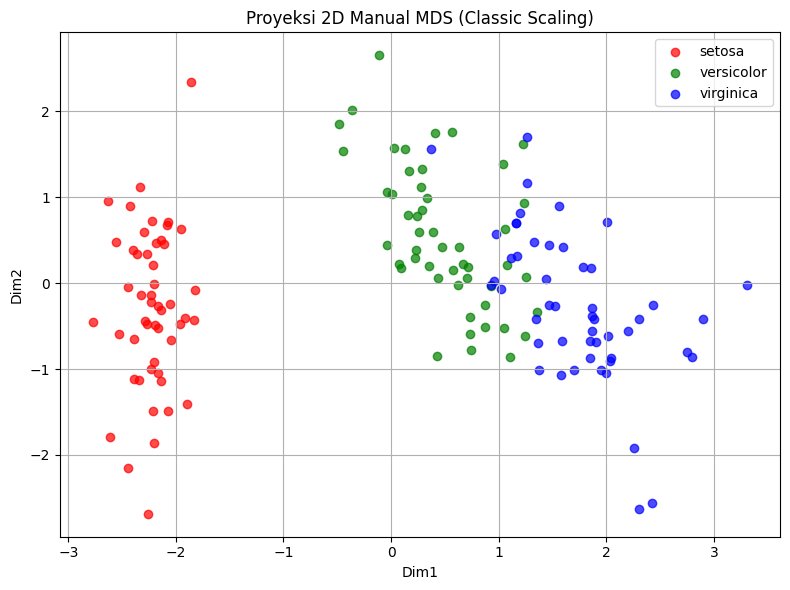

In [ ]:
# 1. Hitung eigenvalue dan eigenvector dari matriks B
eig_vals_B, eig_vecs_B = np.linalg.eigh(B)  # eigh karena B simetris

# 2. Urutkan eigenvalue dari besar ke kecil
sorted_idx_B = np.argsort(eig_vals_B)[::-1]
eig_vals_sorted_B = eig_vals_B[sorted_idx_B]
eig_vecs_sorted_B = eig_vecs_B[:, sorted_idx_B]

# 3. Ambil dua komponen terbesar (dimensi 2D)
top_2_eigvals_B = eig_vals_sorted_B[:2]
top_2_eigvecs_B = eig_vecs_sorted_B[:, :2]

# 4. Proyeksikan ke 2D: gunakan akar dari eigenvalue untuk skala
X_mds_manual = top_2_eigvecs_B * np.sqrt(top_2_eigvals_B)

# 5. Buat DataFrame hasil proyeksi
df_mds_manual = pd.DataFrame(X_mds_manual, columns=['Dim1', 'Dim2'])
df_mds_manual['target'] = y

# 6. Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
target_names = ['setosa', 'versicolor', 'virginica']

for i, label in enumerate(np.unique(y)):
    plt.scatter(
        df_mds_manual[df_mds_manual['target'] == label]['Dim1'],
        df_mds_manual[df_mds_manual['target'] == label]['Dim2'],
        color=colors[i],
        label=target_names[i],
        alpha=0.7
    )

plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Proyeksi 2D Manual MDS (Classic Scaling)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Total dari semua eigenvalue positif
positive_eigvals = eig_vals_sorted_B[eig_vals_sorted_B > 0]
total_positive = np.sum(positive_eigvals)

# 2. Hitung proporsi (inertia) dari masing-masing komponen
explained_variance_mds = positive_eigvals / total_positive

# 3. Buat DataFrame untuk analisis
mds_explained_df = pd.DataFrame({
    'Komponen': [f'Dim{i+1}' for i in range(len(positive_eigvals))],
    'Eigenvalue': positive_eigvals,
    'Explained Variance (%)': explained_variance_mds * 100,
    'Cumulative Variance (%)': np.cumsum(explained_variance_mds) * 100
})

print("📊 Variansi yang Dijelaskan oleh MDS:")
display(mds_explained_df)

📊 Variansi yang Dijelaskan oleh MDS:


,Komponen,Eigenvalue,Explained Variance (%),Cumulative Variance (%)
0,Dim1,4.377747e+02,7.296245e+01,72.962445
1,Dim2,1.371046e+02,2.285076e+01,95.813207
2,Dim3,2.201353e+01,3.668922e+00,99.482129
3,Dim4,3.107225e+00,5.178709e-01,100.000000
4,Dim5,1.547615e-13,2.579359e-14,100.000000
...,...,...,...,...
69,Dim70,1.340005e-15,2.233342e-16,100.000000
70,Dim71,1.260306e-15,2.100510e-16,100.000000
71,Dim72,4.962512e-16,8.270853e-17,100.000000
72,Dim73,4.202537e-16,7.004229e-17,100.000000


## 4. Visualisasi Hasil PCA dan MDS

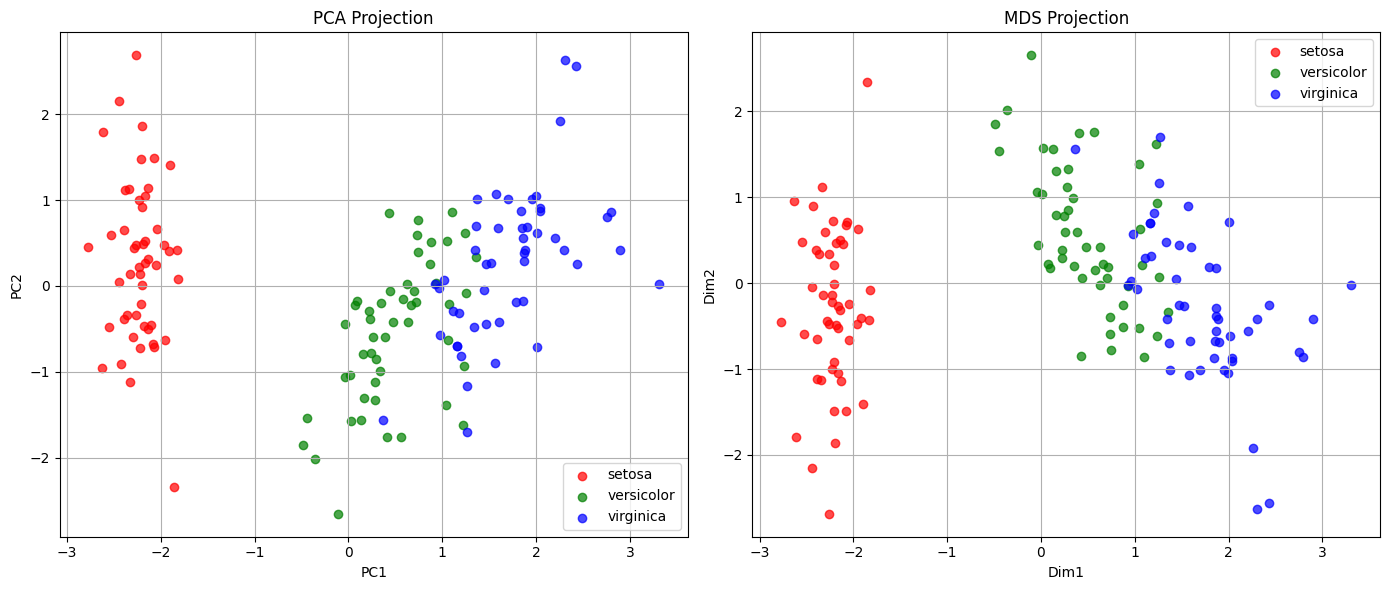

In [ ]:
# Buat figure dengan 2 subplot (PCA dan MDS)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Warna dan label
colors = ['red', 'green', 'blue']
labels = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# --- Plot PCA ---
for i, label in enumerate(np.unique(y)):
    axes[0].scatter(
        df_pca[df_pca['target'] == label]['PC1'],
        df_pca[df_pca['target'] == label]['PC2'],
        label=labels[label],
        color=colors[i],
        alpha=0.7
    )
axes[0].set_title('PCA Projection')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
axes[0].grid(True)

# --- Plot MDS ---
for i, label in enumerate(np.unique(y)):
    axes[1].scatter(
        df_mds_manual[df_mds_manual['target'] == label]['Dim1'],
        df_mds_manual[df_mds_manual['target'] == label]['Dim2'],
        label=labels[label],
        color=colors[i],
        alpha=0.7
    )
axes[1].set_title('MDS Projection')
axes[1].set_xlabel('Dim1')
axes[1].set_ylabel('Dim2')
axes[1].legend()
axes[1].grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()